# ICE7_Siyuan_Gu

## Diagnostic Metrics

Since I already did evaluation of ACA2 by using confusion matrix and it works well. I will do diagnose on ACA3 by using elbow method to see whether the clustering is good or not.

### 1. Import our ACA3 dataset 

In [1]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM/ACA3_dataset')

In [3]:
import numpy as np
import pandas as pd

In [4]:
college = pd.read_csv("CollegeScoreCard.csv", low_memory=False)

In [5]:
import sklearn

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [7]:
Score_Selected = college[['UNITID','COSTT4_A','Diversity','C150_M']]
Score_Selected

,UNITID,COSTT4_A,Diversity,C150_M
0,100654,18888.0,0.0135,0.2914
1,100663,19990.0,0.1293,0.5377
2,100690,12300.0,0.0186,0.6667
3,100706,20306.0,0.1339,0.4835
4,100724,17400.0,0.0416,0.2517
...,...,...,...,...
7799,48285703,NaN,NaN,0.0000
7800,48285704,NaN,NaN,0.0000
7801,48285705,NaN,NaN,0.0000
7802,48285706,NaN,NaN,0.0000


Again, do the same step for cleaning up the dataset.

In [8]:
Score_Selected = Score_Selected.dropna(axis =0, how = 'any')

In [9]:
Score_Clean = Score_Selected.drop(columns=['UNITID'])

## 2. Elbow Method

In [10]:
from yellowbrick.cluster import KElbowVisualizer

`Distortion Score` for elbow method.

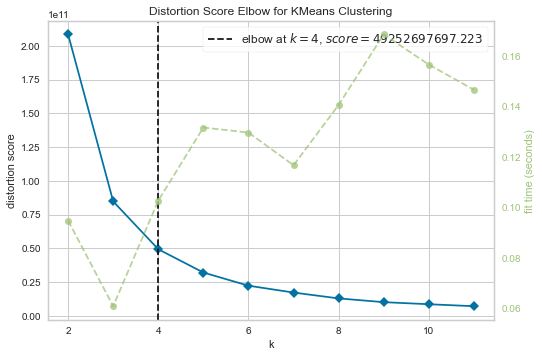

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12)
)

visualizer.fit(Score_Clean)
visualizer.show()  

Or we could run a test with `calinski_harabasz score`.

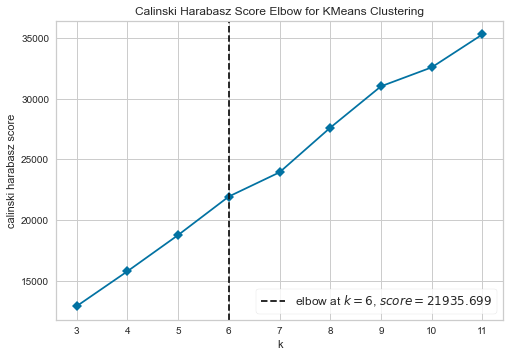

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(Score_Clean)
visualizer.show() 

Seems like we need a little bit more information on cluster of 5 and 6, let's do it with `silhouette_score`.

In [18]:
from yellowbrick.cluster import silhouette_visualizer

C:\Users\gusiy\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\gusiy\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\gusiy\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


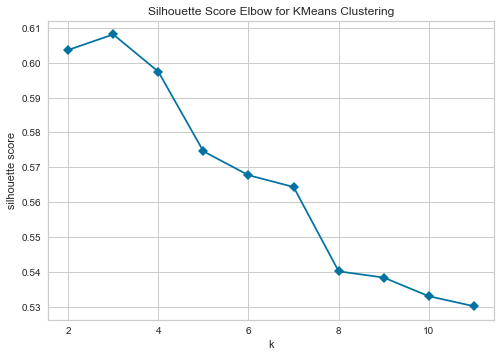

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(Score_Clean)
visualizer.show() 

With more clusters, the `Silhouetter Score` keeps going down.

While `calinski_harbasz score` is fast to compute, it is generally higher for convex clusters than other types of clusters such as density clusters.

## 3. Final Evaluation of our clustering.

Although the Silhouetter Score of K=4 going down a little bit, we would like to choose K=4 as the SSE fits best(the distortion score).We do not pick K=6 as we are not sure the whole dataset is convex or not.